# Three-class DeepShadows

In [1]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd
from scipy import interpolate
import random

# Colab in order to download files
from google.colab import files

# =========================================
# =========================================
# scikit-learn for Machine Learn

# Preprocessing
from sklearn.preprocessing import StandardScaler #Standar scaler for standardization
from sklearn.manifold import TSNE # Dimensionality reduction technique
from sklearn.model_selection import GridSearchCV #Cross-Validation
from sklearn.utils import resample #Resampling
# Classifiers
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier as RF #Random Forests
# Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# =======================================
# =======================================
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
# Keras Layers
from keras.layers import InputLayer
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
# For one-hot encoding
from keras.utils.np_utils import to_categorical

# ==============================================
# ==============================================
# Matplotlib, seaborn and plot pretty 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=False)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

# Pillow
from PIL import Image

### Import datasets


In [2]:
# Mount drive to upload the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Features - 3class
X_tr = np.float64(np.load("/content/drive/My Drive/Galaxies_Data/X_train_3cat.npy")) #Training
X_val = np.float64(np.load("/content/drive/My Drive/Galaxies_Data/X_val_3cat.npy")) #Validation
X_test = np.float64(np.load("/content/drive/My Drive/Galaxies_Data/X_test_3cat.npy")) #Test


# Labels - 3class
y_tr = np.float64(np.load("/content/drive/My Drive/Galaxies_Data/y_train_3cat.npy")) # Training
y_val = np.float64(np.load("/content/drive/My Drive/Galaxies_Data/y_val_3cat.npy")) #Validation
y_test = np.float64(np.load("/content/drive/My Drive/Galaxies_Data/y_test_3cat.npy")) #Test


# Categorical values of the test test
y_test_cat = np.float64(np.load("/content/drive/My Drive/Galaxies_Data/y_test_cat_3cat.npy")) #Test

#### Build DeepShadows model for 3-level classification

In [4]:
# build the  3-class model
model = keras.models.Sequential()
model.add(InputLayer((64,64,3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(rate=0.4))
model.add(Conv2D(filters=2*16, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(rate=0.4))
model.add(Conv2D(filters=2*32, kernel_size=(3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu',kernel_regularizer=regularizers.l2(0.12)))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer=optimizers.Adadelta(0.1),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x=X_tr, y=y_tr,
          epochs=100, batch_size=64,
          shuffle=True,
          validation_data=(X_val,y_val))

Epoch 1/100
704/704 [==============================] - 6s 8ms/step - loss: 50.9212 - accuracy: 0.7237 - val_loss: 4.5473 - val_accuracy: 0.7703
Epoch 2/100
704/704 [==============================] - 5s 7ms/step - loss: 1.9421 - accuracy: 0.8092 - val_loss: 1.0512 - val_accuracy: 0.7939
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 0.7923 - accuracy: 0.8361 - val_loss: 0.8041 - val_accuracy: 0.7719
Epoch 4/100
704/704 [==============================] - 5s 7ms/step - loss: 0.6040 - accuracy: 0.8511 - val_loss: 0.7629 - val_accuracy: 0.7777
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 0.5302 - accuracy: 0.8572 - val_loss: 0.7116 - val_accuracy: 0.7747
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 0.4930 - accuracy: 0.8604 - val_loss: 0.6841 - val_accuracy: 0.7855
Epoch 7/100
704/704 [==============================] - 5s 7ms/step - loss: 0.4712 - accuracy: 0.8622 - val_loss: 0.4847 - val_accuracy: 0.854


Plot History



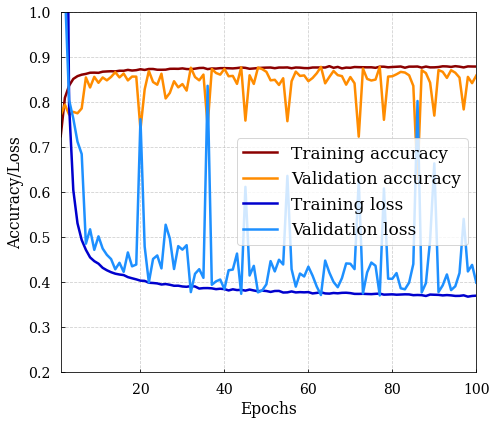

In [6]:
Epochs = np.arange(1,101,1)
history_dict = model.history.history

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_err = 1.0 - np.asarray(train_acc)
val_err = 1.0 - np.asarray(val_acc)

# =====================================================================
# =====================================================================
plt.figure(figsize=(7.0, 6.0))

# Plot Accuracy
plt.plot(Epochs, train_acc, c = 'darkred',linewidth=2.5,label='Training accuracy')
plt.plot(Epochs, val_acc , c = 'darkorange',linewidth=2.5,label='Validation accuracy')
# Plot Loss
plt.plot(Epochs, train_loss, c = 'mediumblue',linewidth=2.5,label='Training loss')
plt.plot(Epochs, val_loss , c = 'dodgerblue',linewidth=2.5,label='Validation loss')

# =====================================================================
plt.grid(ls='--',alpha=0.6)
plt.xlabel('Epochs', fontsize=15.5);plt.ylabel('Accuracy/Loss',fontsize=15.5)
plt.xlim(1,100)
plt.ylim(0.2,1)
plt.legend(frameon=True, loc='center right', fontsize=17)
plt.tick_params(axis='both', labelsize=14)

plt.tight_layout()
#plt.savefig("/content/drive/My Drive/Plots/Acc_Loss_3Class.pdf")
#files.download("/content/drive/My Drive/Plots/Acc_Loss_3Class.pdf")
plt.show()

In [7]:
# Predict on test data 
y_pred_DL = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Make confusion matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

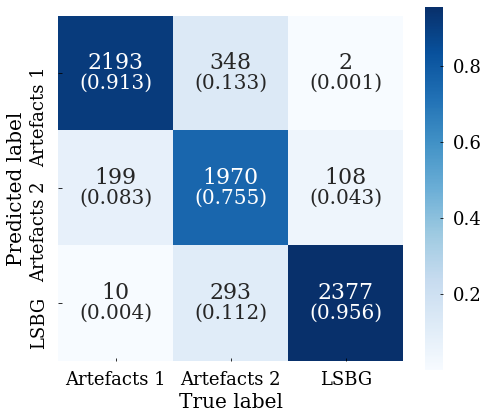

In [17]:
# Get the confusion matrix for the Deep Learning
con_mat_DL = confusion_matrix(y_test_cat, y_pred_DL)
class_names = ['Artefacts 1','Artefacts 2','LSBG']

# Get annotations and normalized confusion matrix
a_three = con_mat_DL[0]/np.sum(con_mat_DL[0])
b_three = con_mat_DL[1]/np.sum(con_mat_DL[1])
c_three = con_mat_DL[2]/np.sum(con_mat_DL[2])

con_mat_norm_three = np.zeros([3,3])
con_mat_norm_three[0] = a_three
con_mat_norm_three[1] = b_three
con_mat_norm_three[2] = c_three


# Annotations
# First line
an_1_three = "("+"{:.3f}".format(a_three[0])+")"
an_2_three = "("+"{:.3f}".format(a_three[1])+")"
an_3_three = "("+"{:.3f}".format(a_three[2])+")"
# Second line 
an_4_three = "("+"{:.3f}".format(b_three[0])+")"
an_5_three = "("+"{:.3f}".format(b_three[1])+")"
an_6_three = "("+"{:.3f}".format(b_three[2])+")"
# Third line
an_7_three = "("+"{:.3f}".format(c_three[0])+")"
an_8_three = "("+"{:.3f}".format(c_three[1])+")"
an_9_three = "("+"{:.3f}".format(c_three[2])+")"

annots_three = np.zeros([3,3],dtype='U7')

annots_three[0,0] = an_1_three;annots_three[0,1] = an_2_three;annots_three[0,2] =  an_3_three
annots_three[1,0] = an_4_three;annots_three[1,1] = an_5_three;annots_three[1,2] =  an_6_three
annots_three[2,0] = an_7_three;annots_three[2,1] = an_8_three;annots_three[2,2] =  an_9_three

# =======================================================
# =======================================================
plt.figure(figsize = (7.0,6.2))
g = sns.heatmap(con_mat_DL.T, square = True, annot=True,annot_kws={'va':'bottom',"size": 22},fmt='.0f', cmap='Blues', cbar=False, 
           xticklabels= class_names,
           yticklabels= class_names)
sns.heatmap(con_mat_norm_three.T, square=True, annot=annots_three.T, annot_kws={'va':'top',"size": 20},cmap='Blues',fmt='', cbar=True,
            cbar_kws={'shrink':0.94})
g.set_xticklabels(class_names, fontsize = 18)
g.set_yticklabels(class_names, fontsize = 18)



# Ticks for colorbar
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=18)

plt.xlabel('True label',fontsize=20)
plt.ylabel('Predicted label',fontsize=20)

plt.tight_layout()
plt.savefig("/content/drive/My Drive/Plots/Conf_matrix_3cat_DL.pdf")
#files.download("/content/drive/My Drive/Plots/Conf_matrix_3cat_DL.pdf")
plt.show()

### Reduced confusion matrix

Ceate a confusion matrix 

In [18]:
y_pred_reduced = np.copy(y_pred_DL)
y_pred_reduced[y_pred_reduced==1.0] = 0.0
y_pred_reduced[y_pred_reduced==2.0] = 1.0

y_test_reduced = np.copy(y_test_cat)
y_test_reduced[y_test_reduced==1.0] = 0.0
y_test_reduced[y_test_reduced==2.0] = 1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

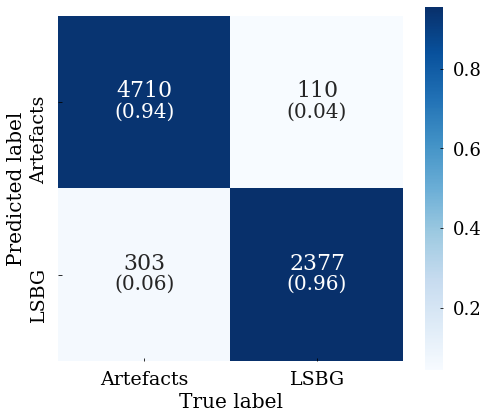

In [22]:
# Get the confusion matrix for the Deep Learning
con_mat_DL_red = confusion_matrix(y_test_reduced, y_pred_reduced)
class_names_red = ['Artefacts','LSBG']


# Get annotations and normalized confusion matrix
a_red = con_mat_DL_red[0]/np.sum(con_mat_DL_red[0])
b_red = con_mat_DL_red[1]/np.sum(con_mat_DL_red[1])

con_mat_norm_red = np.zeros([2,2])
con_mat_norm_red[0] = a_red
con_mat_norm_red[1] = b_red


# Annotations
# First line
an_1_red = "("+"{:.2f}".format(a_red[0])+")"
an_2_red = "("+"{:.2f}".format(a_red[1])+")"
# Second line
an_3_red = "("+"{:.2f}".format(b_red[0])+")"
an_4_red = "("+"{:.2f}".format(b_red[1])+")"

annots_red = np.zeros([2,2],dtype='U6')

annots_red[0,0] = an_1_red;annots_red[0,1] = an_2_red
annots_red[1,0] = an_3_red;annots_red[1,1] = an_4_red


plt.figure(figsize = (7.0,6.2))
g = sns.heatmap(con_mat_DL_red.T, square = True, annot=True,annot_kws={'va':'bottom',"size": 22},fmt='.0f', cmap='Blues', cbar=False, 
           xticklabels= class_names_red,
           yticklabels= class_names_red)
sns.heatmap(con_mat_norm_red.T, square=True, annot=annots_red.T, annot_kws={'va':'top',"size": 20},cmap='Blues',fmt='', cbar=True,
            cbar_kws={'shrink':0.94})

g.set_xticklabels(class_names_red, fontsize = 19)
g.set_yticklabels(class_names_red, fontsize = 19)

# Ticks for colorbar
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=18)

plt.xlabel('True label',fontsize=20)
plt.ylabel('Predicted label',fontsize=20)

plt.tight_layout()
plt.savefig("/content/drive/My Drive/Plots/Conf_matrix_3cat_red_DL.pdf")
files.download("/content/drive/My Drive/Plots/Conf_matrix_3cat_red_DL.pdf")
plt.show()